This is the notebook template for ISLP Charpter 4 applied practice.

In [103]:
def importlib():
    global pd, np, sns, plt, smf, sms, ProbPlot, train_test_split
    global LogisticRegression, accuracy_score, classification_report, confusion_matrix
    global LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis,KNeighborsClassifier,GaussianNB
    # import necessary libraries
    import pandas as pd
    import numpy as np
    import seaborn as sns
    import matplotlib.pyplot as plt
    import statsmodels.formula.api as smf
    import statsmodels.api as sms
    from statsmodels.graphics.gofplots import ProbPlot
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #linear discriminant analysis
    from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis #quadratic discriminant analysis
    from sklearn.neighbors import KNeighborsClassifier #K nearest neighbours (KNN)
    from sklearn.naive_bayes import GaussianNB
    print('done')

importlib()

done


## 4.13.
This question should be answered using the `Weekly` data set, which is part of the ISLP package. This data is similar in nature to the `Smarket` data from this chapter’s lab, except that it contains 1,089 weekly returns for 21 years, from the beginning of 1990 to the end of 2010.

(a) Produce some numerical and graphical summaries of the `Weekly` data. Do there appear to be any patterns?

In [29]:
importlib()

done


In [14]:
df = pd.read_csv('Weekly.csv')
df.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,1990,0.816,1.572,-3.936,-0.229,-3.484,0.154976,-0.270,Down
1,1990,-0.270,0.816,1.572,-3.936,-0.229,0.148574,-2.576,Down
2,1990,-2.576,-0.270,0.816,1.572,-3.936,0.159837,3.514,Up
3,1990,3.514,-2.576,-0.270,0.816,1.572,0.161630,0.712,Up
4,1990,0.712,3.514,-2.576,-0.270,0.816,0.153728,1.178,Up


In [15]:
df.describe()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
count,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000,1089.000000
mean,2000.048669,0.150585,0.151079,0.147205,0.145818,0.139893,1.574618,0.149899
std,6.033182,2.357013,2.357254,2.360502,2.360279,2.361285,1.686636,2.356927
min,1990.000000,-18.195000,-18.195000,-18.195000,-18.195000,-18.195000,0.087465,-18.195000
25%,1995.000000,-1.154000,-1.154000,-1.158000,-1.158000,-1.166000,0.332022,-1.154000
50%,2000.000000,0.241000,0.241000,0.241000,0.238000,0.234000,1.002680,0.241000
75%,2005.000000,1.405000,1.409000,1.409000,1.409000,1.405000,2.053727,1.405000
max,2010.000000,12.026000,12.026000,12.026000,12.026000,12.026000,9.328214,12.026000


In [16]:
df.corr()

/var/folders/b4/dg1qfb_d7dlfv97__53drbzr0000gn/T/ipykernel_84669/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Year,1.000000,-0.032289,-0.033390,-0.030006,-0.031128,-0.030519,0.841942,-0.032460
Lag1,-0.032289,1.000000,-0.074853,0.058636,-0.071274,-0.008183,-0.064951,-0.075032
Lag2,-0.033390,-0.074853,1.000000,-0.075721,0.058382,-0.072499,-0.085513,0.059167
Lag3,-0.030006,0.058636,-0.075721,1.000000,-0.075396,0.060657,-0.069288,-0.071244
Lag4,-0.031128,-0.071274,0.058382,-0.075396,1.000000,-0.075675,-0.061075,-0.007826
Lag5,-0.030519,-0.008183,-0.072499,0.060657,-0.075675,1.000000,-0.058517,0.011013
Volume,0.841942,-0.064951,-0.085513,-0.069288,-0.061075,-0.058517,1.000000,-0.033078
Today,-0.032460,-0.075032,0.059167,-0.071244,-0.007826,0.011013,-0.033078,1.000000


### Observation
* relation between Year and Volume worth exploring

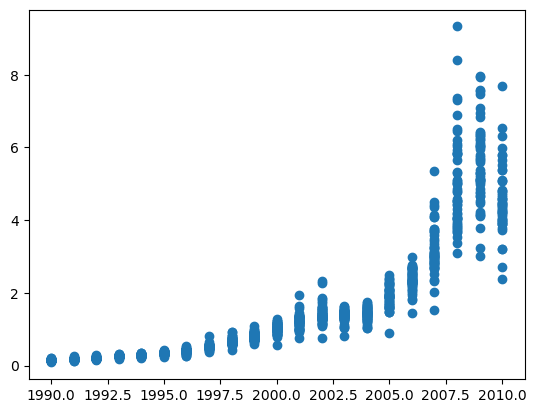

In [18]:
plt.scatter(df['Year'],df['Volume'])

<Figure size 2000x2000 with 0 Axes>

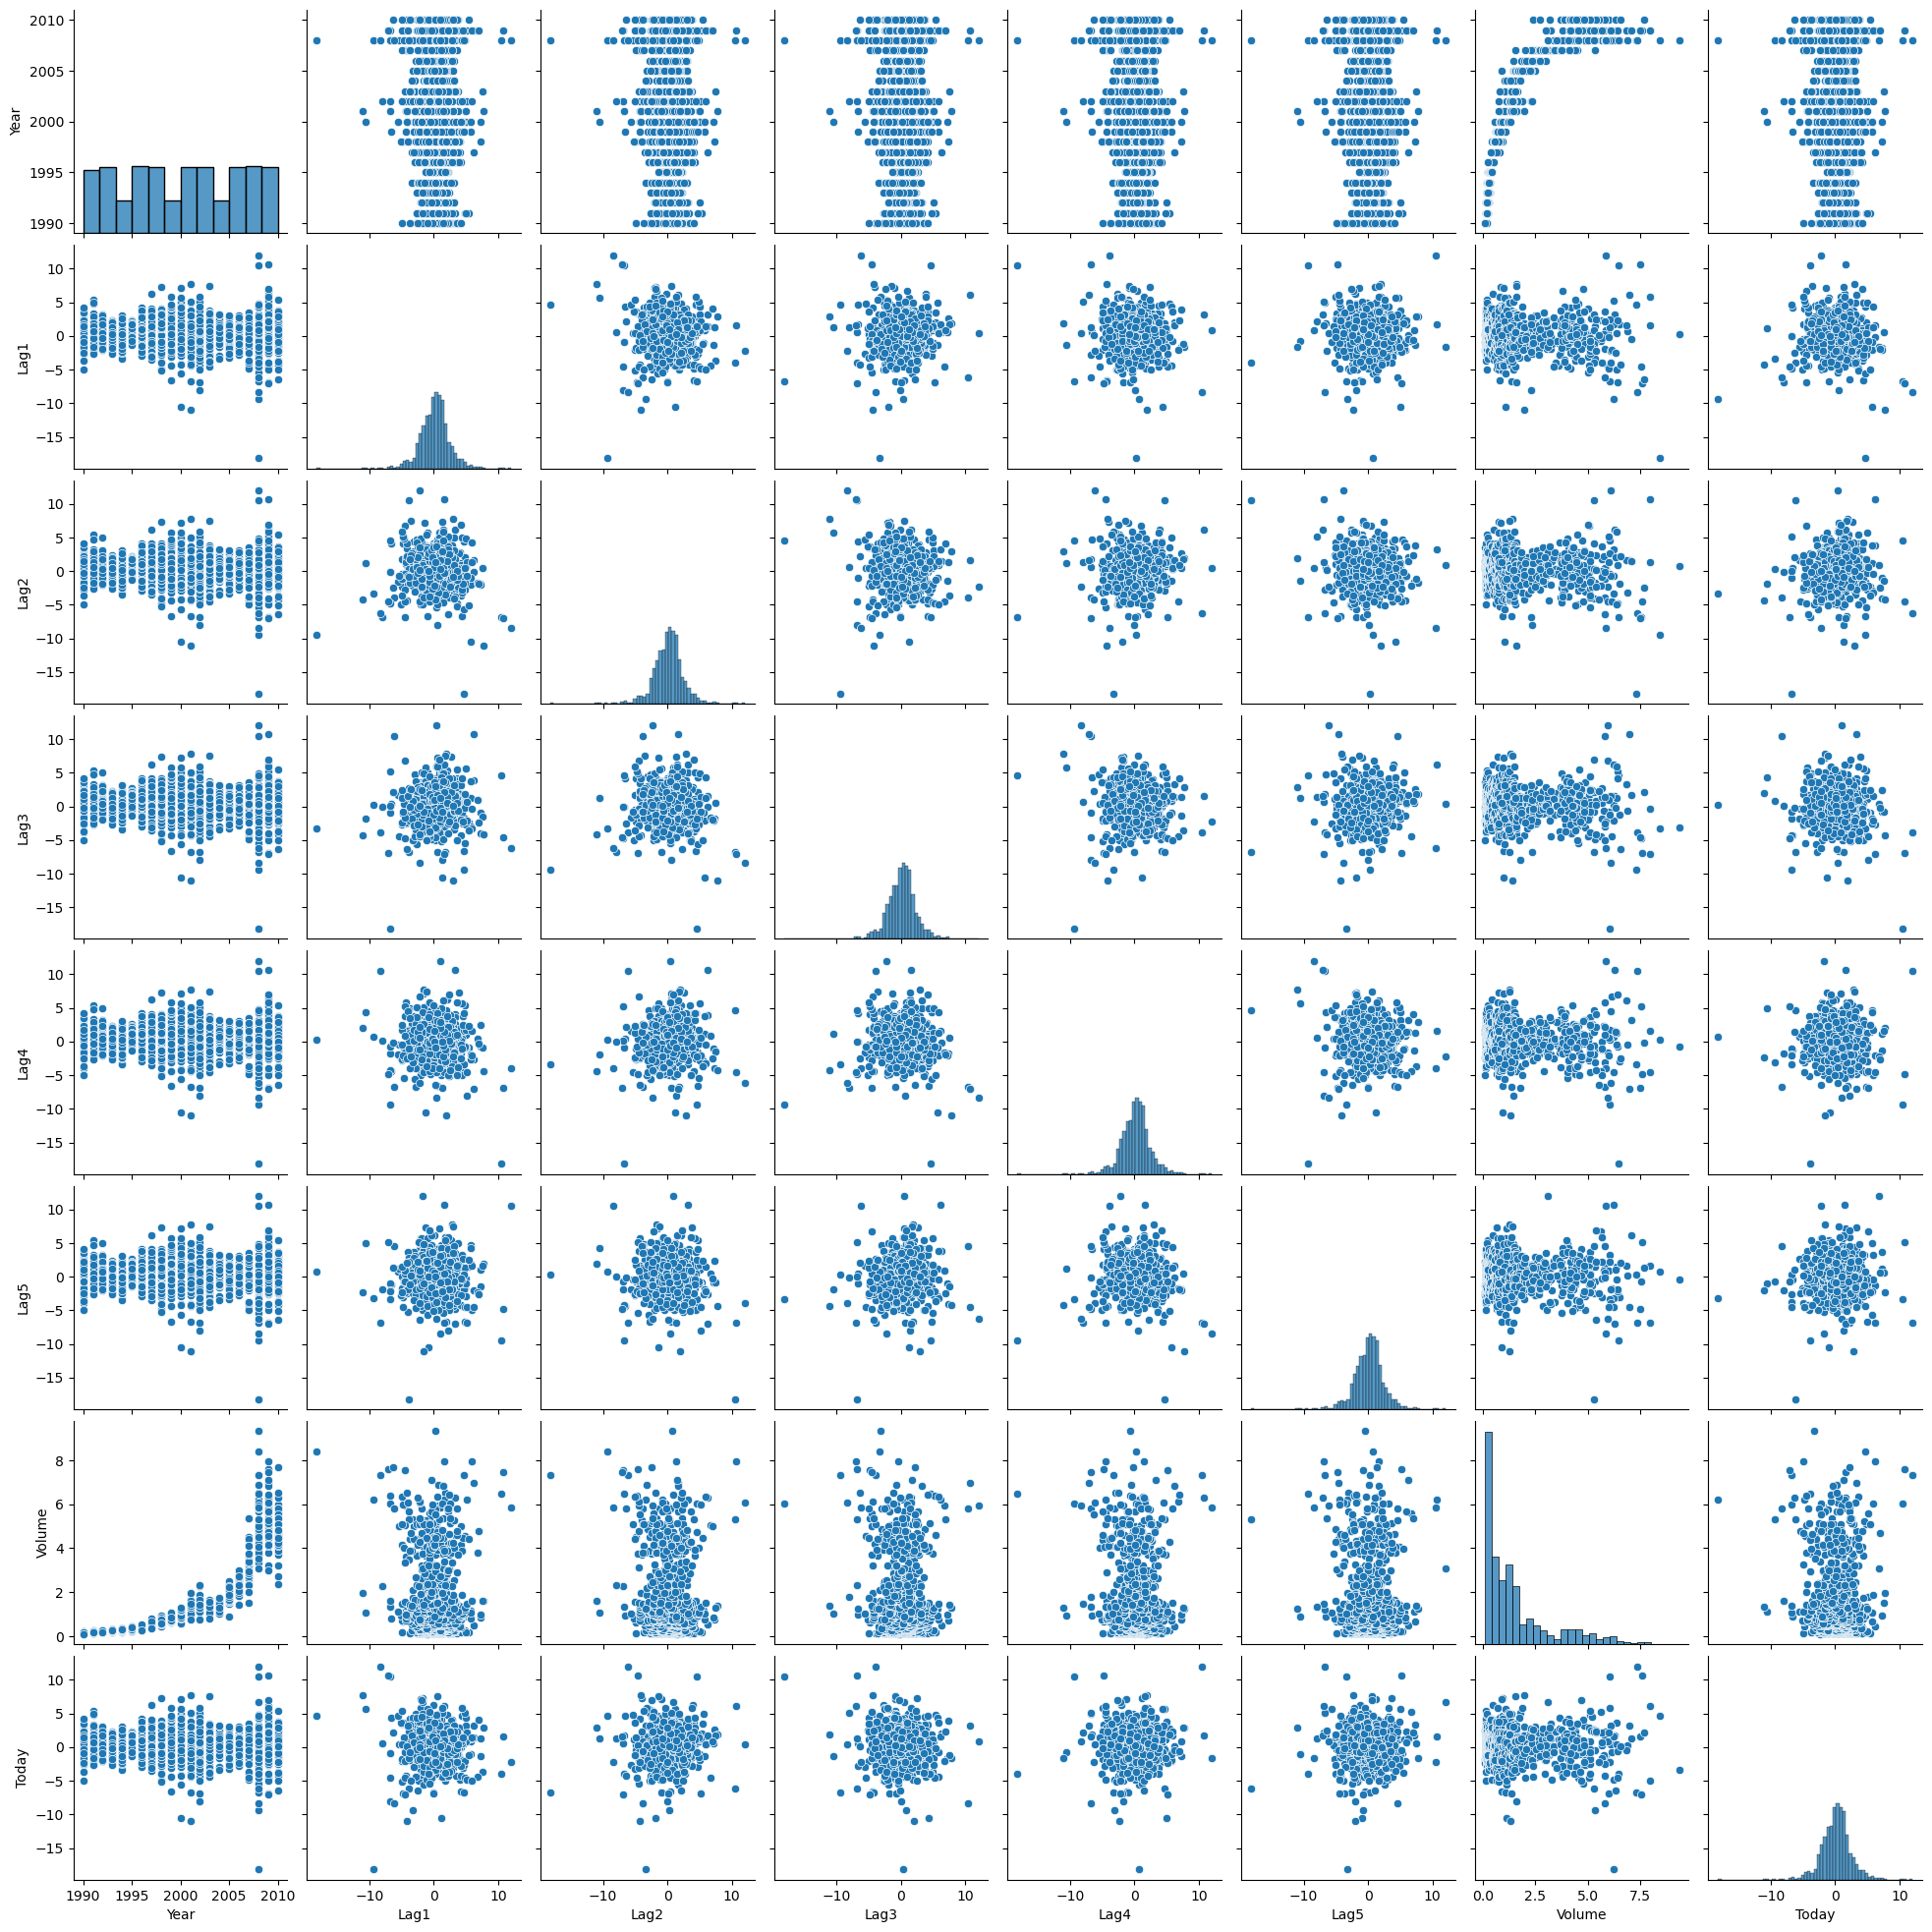

In [26]:
plt.figure(figsize=(20, 20))
sns.pairplot(df)

(b) Use the full data set to perform a logistic regression with
`Direction` as the response and the five lag variables plus `Volume` as predictors. Use the summary function to print the results. Do any of the predictors appear to be statistically significant? If so, which ones?

In [30]:
# Option 1: use sklearn LogisticRegression
X= df[['Lag1', 'Lag2','Lag3','Lag4','Lag5','Volume']]
y = df['Direction']
print(X.head(2))
print(y.head(2))

    Lag1   Lag2   Lag3   Lag4   Lag5    Volume
0  0.816  1.572 -3.936 -0.229 -3.484  0.154976
1 -0.270  0.816  1.572 -3.936 -0.229  0.148574
0    Down
1    Down
Name: Direction, dtype: object


In [49]:
# Step 2: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary
# Access the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y,model.predict(X))
print(conf_m)

Coefficients: [[ 4.19301378e-05 -4.36664944e-02  7.38703172e-02 -1.97799299e-02
  -3.48864146e-02 -1.68487785e-02 -1.54027029e-02]]
Intercept: [0.19272884]
Accuracy: 0.5642201834862385
              precision    recall  f1-score   support

           0       0.38      0.20      0.26        84
           1       0.61      0.79      0.69       134

    accuracy                           0.56       218
   macro avg       0.50      0.50      0.48       218
weighted avg       0.52      0.56      0.53       218

[[112 372]
 [113 492]]


In [45]:
# Option2 use stats model
# Add a constant to the features (X) matrix
X = sms.add_constant(X)
# Transform categorical variable to numerical variable
y =df['Direction'].map({'Down':0, 'Up':1})

y.head()

0    0
1    0
2    1
3    1
4    1
Name: Direction, dtype: int64

In [53]:

# Create and fit the logistic regression model
model = sms.Logit(y, X)
result = model.fit()

# Print the summary of the model
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.682441
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:              Direction   No. Observations:                 1089
Model:                          Logit   Df Residuals:                     1082
Method:                           MLE   Df Model:                            6
Date:                Wed, 01 May 2024   Pseudo R-squ.:                0.006580
Time:                        14:07:45   Log-Likelihood:                -743.18
converged:                       True   LL-Null:                       -748.10
Covariance Type:            nonrobust   LLR p-value:                    0.1313
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2669      0.086      3.106      0.002       0.098       0.435
Lag1          -0.0413      0.

`Lag2` seems to be a predictor with statistical significance. We can say that because Lag2 has a small P|z|, meaning that there's a small probability that `Lag2` coefficient is equal to zero.

Note: Notice that the coefficients are not exactly the same. That happens because scikit-learn applies some kind of parameter regularization. 

You can confirm this by reading the scikit-learn documentation, as suggested [here](http://stats.stackexchange.com/questions/203740/logistic-regression-scikit-learn-vs-statsmodels).
An option to overcome this is to for LogisticRegression to use a big C value (e.g. 1e9).



(c) Compute the confusion matrix and overall fraction of correct predictions. Explain what the confusion matrix is telling you about the types of mistakes made by logistic regression.

In [54]:
# confusion matrix for statsmodel model
mat = pd.DataFrame(result.pred_table().astype(int), columns = ["Down", "Up"], index = ["Down", "Up"])
mat

,Down,Up
Down,54,430
Up,48,557


In [55]:
# caculate accuracy
# Get predicted probabilities
y_pred_proba = result.predict(X)

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.round(y_pred_proba)

# Calculate accuracy
accuracy = np.mean(y_pred == y)
print(accuracy)

0.5610651974288338


(d) Now fit the logistic regression model using a training data period from 1990 to 2008, with `Lag2` as the only predictor. Compute the confusion matrix and the overall fraction of correct predictions for the held out data (that is, the data from 2009 and 2010).

In [81]:
df_train = df[(df['Year']>= 1990)&(df['Year']<= 2008)]
df_test = df[(df['Year']>= 2009)&(df['Year']<=2010)]



In [95]:
# use sklearn

# prepare data
X_train = df_train['Lag2']
# when there is only one feature, X need to be reshaped, why?
X_train=X_train.values.reshape(np.shape(X_train)[0],1)
#print(X_train)


In [90]:
X_test = df_test['Lag2']
X_test=X_test.values.reshape(np.shape(X_test)[0],1)

In [91]:
y_train = df_train['Direction']
y_test = df_test['Direction']

In [93]:
# Step 3: Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary
# Access the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Coefficients: [[0.05804742]]
Intercept: [0.20326236]
Accuracy: 0.625
              precision    recall  f1-score   support

        Down       0.64      0.21      0.32        43
          Up       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104

[[ 9 34]
 [ 5 56]]


In [94]:
# use statsmodels
X_train = df_train['Lag2']
X_test = df_test['Lag2']

# Add a constant to the features (X) matrix
X_train = sms.add_constant(X_train)
X_test = sms.add_constant(X_test)

# Transform categorical variable to numerical variable
y_train = df_train['Direction'].map({'Up':1,'Down':0})
y_test = df_test['Direction'].map({'Up':1,'Down':0})

# Create and fit the logistic regression model
model = sms.Logit(y_train, X_train)
result = model.fit()

y_pred_proba = result.predict(X_test)

# Convert probabilities to binary predictions (0 or 1)
y_pred = np.round(y_pred_proba)

# Calculate accuracy
accuracy = np.mean(y_pred == y_test)
print(accuracy)

Optimization terminated successfully.
         Current function value: 0.685555
         Iterations 4
0.625


(e) Repeat (d) using LDA.

In [98]:
# use sklearn

# prepare data
X_train = df_train['Lag2']
# when there is only one feature, X need to be reshaped, why?
X_train=X_train.values.reshape(np.shape(X_train)[0],1)

X_test = df_test['Lag2']
X_test=X_test.values.reshape(np.shape(X_test)[0],1)

y_train = df_train['Direction']
y_test = df_test['Direction']

In [99]:
# Step 3: Create and train the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary
# Access the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Coefficients: [[0.05768451]]
Intercept: [0.203424]
Accuracy: 0.625
              precision    recall  f1-score   support

        Down       0.64      0.21      0.32        43
          Up       0.62      0.92      0.74        61

    accuracy                           0.62       104
   macro avg       0.63      0.56      0.53       104
weighted avg       0.63      0.62      0.57       104

[[ 9 34]
 [ 5 56]]


(f) Repeat (d) using QDA.

In [101]:
# Step 3: Create and train the QDA model
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Accuracy: 0.5865384615384616
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00        43
          Up       0.59      1.00      0.74        61

    accuracy                           0.59       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.34      0.59      0.43       104

[[ 0 43]
 [ 0 61]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(g) Repeat (d) using KNN with K = 1.

In [102]:
# Step 3: Create and train the KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Accuracy: 0.5288461538461539
              precision    recall  f1-score   support

        Down       0.42      0.35      0.38        43
          Up       0.59      0.66      0.62        61

    accuracy                           0.53       104
   macro avg       0.50      0.50      0.50       104
weighted avg       0.52      0.53      0.52       104

[[15 28]
 [21 40]]


(h) Repeat (d) using naive Bayes.

In [105]:
# Step 3: Create and train the NB model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Accuracy: 0.5865384615384616
              precision    recall  f1-score   support

        Down       0.00      0.00      0.00        43
          Up       0.59      1.00      0.74        61

    accuracy                           0.59       104
   macro avg       0.29      0.50      0.37       104
weighted avg       0.34      0.59      0.43       104

[[ 0 43]
 [ 0 61]]


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(i) Which of these methods appears to provide the best results on this data?

#### Answer: 
The methods that appear to provide the best results are the logistic regression and the linear discriminant analysis (LDA). They are the methods where score (overall fraction of correct predictions) is higher (0.625 vs 0.587 vs 0.490)

(j) Experiment with different combinations of predictors, including possible transformations and interactions, for each of the methods. Report the variables, method, and associated confu- sion matrix that appears to provide the best results on the held out data. Note that you should also experiment with values for K in the KNN classifier.

## 4.14.
 In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the `Auto` data set.

(a) Create a binary variable, `mpg01`, that contains a 1 if `mpg` contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the `median()` method of the data frame. Note you may find it helpful to add a column `mpg01` to the data frame by assignment. Assuming you have stored the data frame as `Auto`, this can be done as follows:

In [106]:
importlib()

done


In [108]:
df = pd.read_csv('Auto.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [112]:
df['mpg01'] = df['mpg'].apply(lambda x: 1 if x > df['mpg'].median() else 0)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg01
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0


(b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting `mpg01`? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

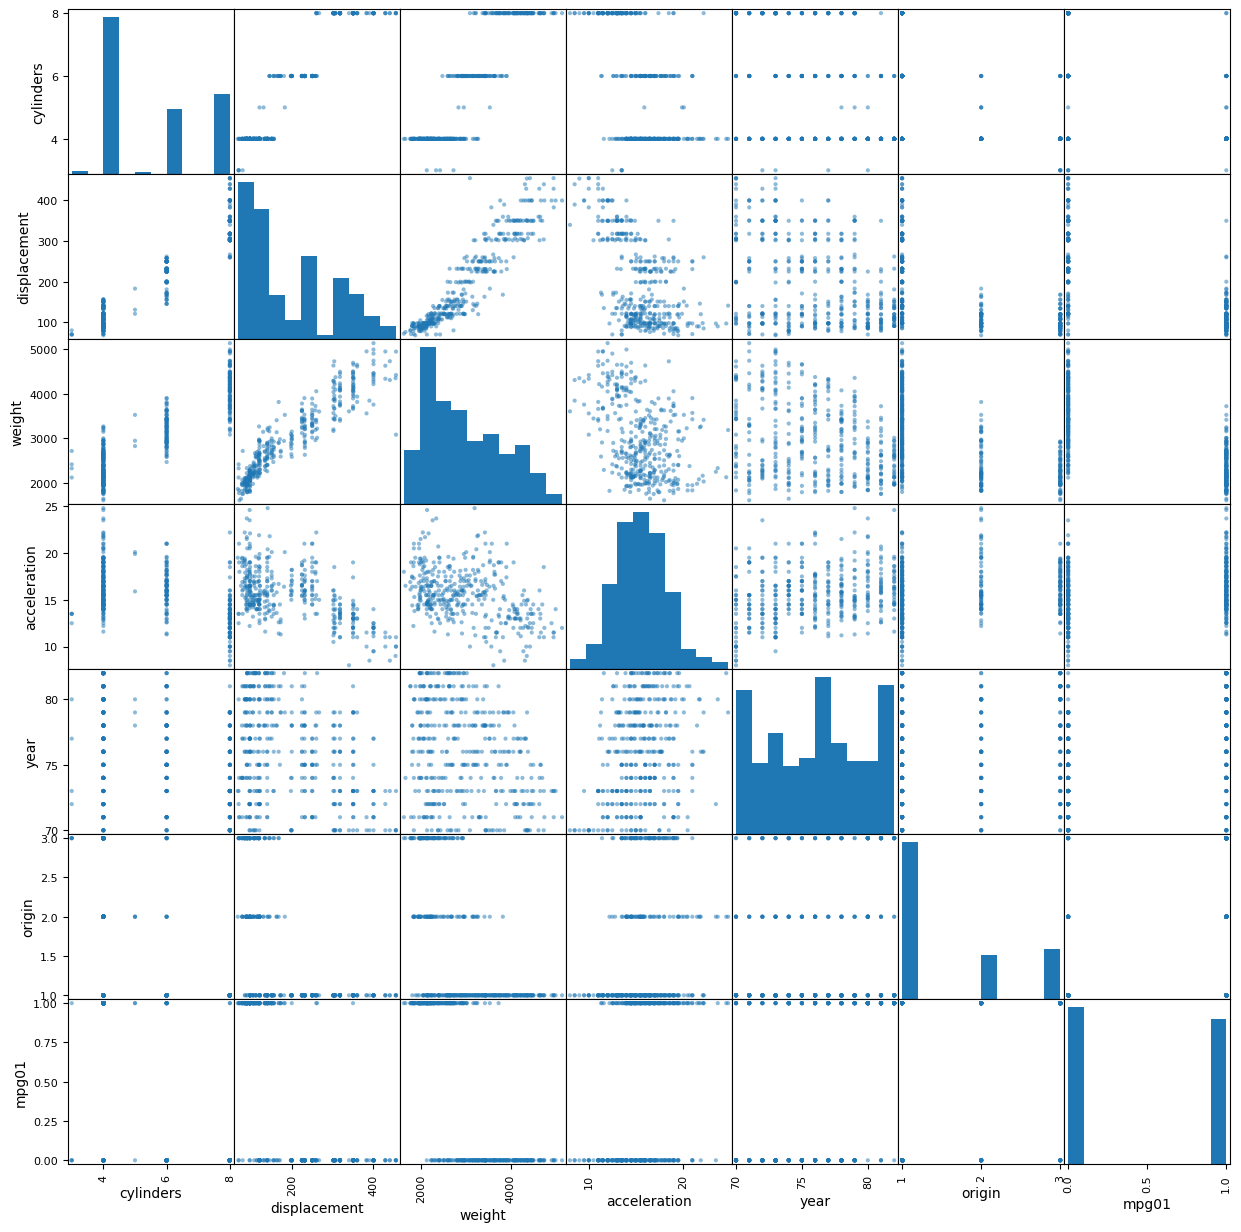

In [118]:
pd.plotting.scatter_matrix(df.drop(columns = ['mpg','name']),figsize=(15,15));

In [119]:
df.corr()

/var/folders/b4/dg1qfb_d7dlfv97__53drbzr0000gn/T/ipykernel_84669/1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.776260,-0.804443,-0.831739,0.422297,0.581469,0.563698,0.838239
cylinders,-0.776260,1.000000,0.950920,0.897017,-0.504061,-0.346717,-0.564972,-0.740327
displacement,-0.804443,0.950920,1.000000,0.933104,-0.544162,-0.369804,-0.610664,-0.738607
weight,-0.831739,0.897017,0.933104,1.000000,-0.419502,-0.307900,-0.581265,-0.745734
acceleration,0.422297,-0.504061,-0.544162,-0.419502,1.000000,0.282901,0.210084,0.322629
year,0.581469,-0.346717,-0.369804,-0.307900,0.282901,1.000000,0.184314,0.454108
origin,0.563698,-0.564972,-0.610664,-0.581265,0.210084,0.184314,1.000000,0.511393
mpg01,0.838239,-0.740327,-0.738607,-0.745734,0.322629,0.454108,0.511393,1.000000


(c) Split the data into a training set and a test set.

In [121]:
X_cols = ['cylinders','displacement','weight']
X = df[X_cols]
#X = df.drop(columns = ['mpg','name','mpg01'])
y = df['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X,y)

(d) Perform LDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [122]:
# Step 3: Create and train the LDA model
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary
# Access the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Coefficients: [[-0.70560575 -0.0047121  -0.00222765]]
Intercept: [11.24775715]
Accuracy: 0.9
              precision    recall  f1-score   support

           0       0.98      0.84      0.91        58
           1       0.82      0.98      0.89        42

    accuracy                           0.90       100
   macro avg       0.90      0.91      0.90       100
weighted avg       0.91      0.90      0.90       100

[[49  9]
 [ 1 41]]


(e) Perform QDA on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [123]:
# Step 3: Create and train the QDA model
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        58
           1       0.84      0.98      0.90        42

    accuracy                           0.91       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100

[[50  8]
 [ 1 41]]


(f) Perform logistic regression on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [125]:
# Step 3: Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary
# Access the coefficients
coefficients = model.coef_
intercept = model.intercept_

print("Coefficients:", coefficients)
print("Intercept:", intercept)

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Coefficients: [[ 0.07555436 -0.01711574 -0.00239839]]
Intercept: [9.17300956]
Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.94      0.84      0.89        58
           1       0.81      0.93      0.87        42

    accuracy                           0.88       100
   macro avg       0.88      0.89      0.88       100
weighted avg       0.89      0.88      0.88       100

[[49  9]
 [ 3 39]]


(g) Perform naive Bayes on the training data in order to predict `mpg01` using the variables that seemed most associated with `mpg01` in (b). What is the test error of the model obtained?

In [126]:
# Step 3: Create and train the KNN model
model = GaussianNB()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Accuracy: 0.91
              precision    recall  f1-score   support

           0       0.98      0.86      0.92        58
           1       0.84      0.98      0.90        42

    accuracy                           0.91       100
   macro avg       0.91      0.92      0.91       100
weighted avg       0.92      0.91      0.91       100

[[50  8]
 [ 1 41]]


(h) Perform KNN on the training data, with several values of K, in order to predict `mpg01`. Use only the variables that seemed most associated with `mpg01` in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [124]:
# Step 3: Create and train the KNN model
model = KNeighborsClassifier()
model.fit(X_train, y_train)

# Step 4: Evaluate the model
y_pred = model.predict(X_test)

# print summary

# Print accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report
print(classification_report(y_test, y_pred))

# confusion matrix for sklearn model
conf_m = confusion_matrix(y_test,model.predict(X_test))
print(conf_m)

Accuracy: 0.89
              precision    recall  f1-score   support

           0       0.90      0.91      0.91        58
           1       0.88      0.86      0.87        42

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100

[[53  5]
 [ 6 36]]


In [129]:
# loop through KNN with diff K values

# k = 1 to (n-1)
n = 10 
for k in range(1,n):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy with k={}:".format(k), accuracy_score(y_test, y_pred))

Accuracy with k=1: 0.88
Accuracy with k=2: 0.86
Accuracy with k=3: 0.88
Accuracy with k=4: 0.89
Accuracy with k=5: 0.89
Accuracy with k=6: 0.89
Accuracy with k=7: 0.9
Accuracy with k=8: 0.88
Accuracy with k=9: 0.88


## 4.15.
This problem involves writing functions.

(a) Write a function, `Power()`, that prints out the result of raising 2 to the 3rd power. In other words, your function should compute $2^3$ and print out the results.

$Hint$: Recall that `x**a` raises `x` to the power `a`. Use the `print()` function to display the result.

In [132]:
def power3(x):
    print(x**3)
power3(2)

8


(b) Create a new function, `Power2()`, that allows you to pass any two numbers, x and a, and prints out the value of x**a. You can do this by beginning your function with the line


In [135]:
def power2(x, a):
    print(x**a)
power2(2,3)

8


You should be able to call your function by entering, for instance,on the command line. This should output the value of $3^8$, namely, $6, 561$.


In [136]:
Power2(3, 8)

6561


(c) Using the `Power2()` function that you just wrote, compute $10^3, 8^{17}, and 131^3$.

In [137]:
power2(10,3)
power2(8,17)
power2(131,3)

1000
2251799813685248
2248091


(d) Now create a new function, `Power3()`, that actually returns the
result `x**a` as a Python object, rather than simply printing it
to the screen. That is, if you store the value `x**a` in an object
called result within your function, then you can simply return return this result, using the following line:

In [139]:
def power3(x,a):
    result = x**a
    return result

Note that the line above should be the last line in your function, and it should be indented 4 spaces.

(e) Now using the `Power3()` function, create a plot of $f(x) = x^2$. The $x$-axis should display a range of integers from 1 to 10, and the $y$-axis should display $x^2$. Label the axes appropriately, and use an appropriate title for the figure. Consider displaying either the $x$-axis, the $y$-axis, or both on the log-scale. You can do this by using the `ax.set_xscale()` and `ax.set_yscale()` methods of the axes you are plotting to.

In [154]:
x = np.linspace(1,10,10)
y = power3(x,2)

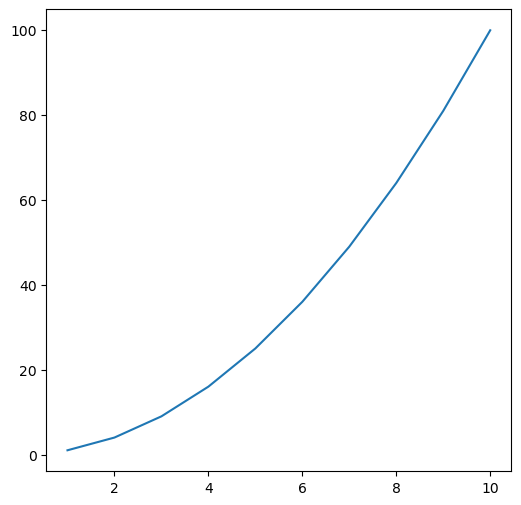

In [157]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y)

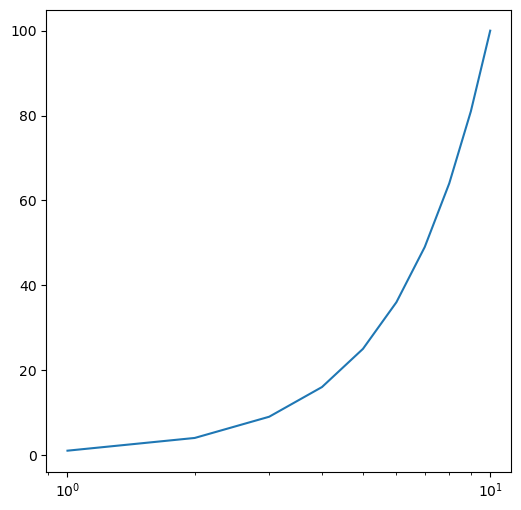

In [151]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(x,y)
ax.set_xscale('log')

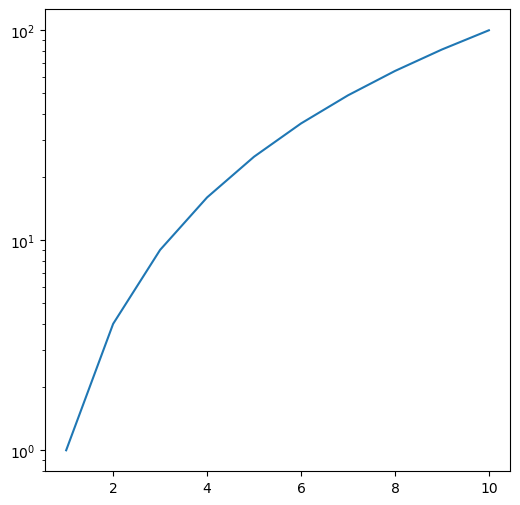

In [155]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y)
ax.set_yscale('log')

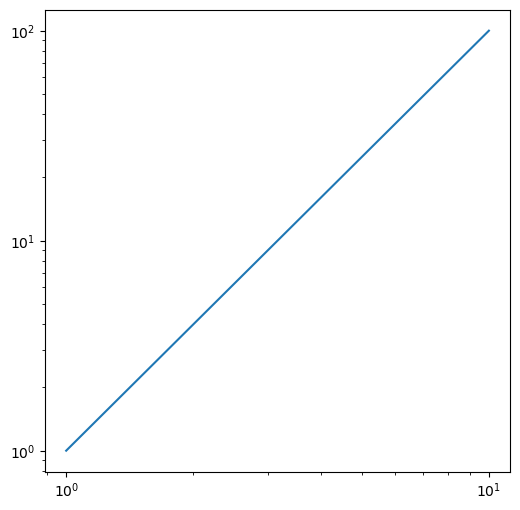

In [156]:
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(x,y)
ax.set_xscale('log')
ax.set_yscale('log')

(f) Create a function, `PlotPower()`, that allows you to create a plot of `x` against `x**a` for a fixed a and a sequence of values of `x`. For instance, if you call, then a plot should be created with an x-axis taking on values $1,2,...,10$, and a y-axis taking on values $1^3,2^3,...,10^3$.

In [158]:
def PlotPower(x,a):
    x = x
    y = x**a
    fig, ax = plt.subplots()
    ax.plot(x,y)
    ax.set_xscale('log')


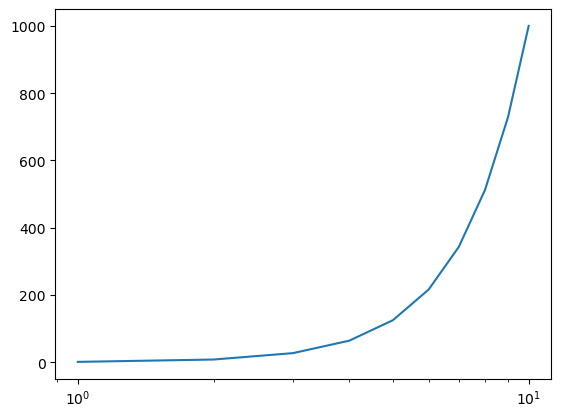

In [159]:
PlotPower(np.arange(1, 11), 3)

## 4.16.
Using the `Boston` data set, fit classification models in order to predict whether a given suburb has a crime rate above or below the median. Explore logistic regression, LDA, naive Bayes, and KNN models using various subsets of the predictors. Describe your findings.

$Hint$: You will have to create the response variable yourself, using the variables that are contained in the `Boston` data set.

In [160]:
importlib()

done


In [161]:
df = pd.read_csv('Boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [167]:
df['crim0'] = df['crim'].apply(lambda x: 1 if x > df['crim'].median() else 0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim0
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,0


In [165]:
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,crim0
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305,0.409395
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445,-0.436151
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725,0.603260
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260,0.070097
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321,0.723235
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360,-0.156372
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955,0.613940
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929,-0.616342
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626,0.619786
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536,0.608741


In [166]:
# select the cols with high correlation with 'crim0' as X
x_cols = ['indus','nox','age','rad','tax']
X = df[x_cols]
y = df['crim0']

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1)

In [179]:
# loop through various models to compare the accuracy (KNN is exclude to compare different k)

models = [LogisticRegression(),LinearDiscriminantAnalysis(),QuadraticDiscriminantAnalysis(),GaussianNB()]

for model in models:
    model = model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print('Summary report for model = {}'.format(model))
    print("Accuracy:{:.2f}".format(accuracy_score(y_test, y_pred)))
    print(classification_report(y_test, y_pred))
    conf_m = confusion_matrix(y_test,model.predict(X_test))
    print(conf_m)

Summary report for model = LogisticRegression()
Accuracy:0.83
              precision    recall  f1-score   support

           0       0.80      0.87      0.83        60
           1       0.87      0.81      0.84        67

    accuracy                           0.83       127
   macro avg       0.84      0.84      0.83       127
weighted avg       0.84      0.83      0.83       127

[[52  8]
 [13 54]]
Summary report for model = LinearDiscriminantAnalysis()
Accuracy:0.82
              precision    recall  f1-score   support

           0       0.74      0.95      0.83        60
           1       0.94      0.70      0.80        67

    accuracy                           0.82       127
   macro avg       0.84      0.83      0.82       127
weighted avg       0.85      0.82      0.82       127

[[57  3]
 [20 47]]
Summary report for model = QuadraticDiscriminantAnalysis()
Accuracy:0.87
              precision    recall  f1-score   support

           0       0.81      0.95      0.88     

In [177]:
# loop through KNN with diff K values

# k = 1 to (n-1)
n = 10 
for k in range(1,n):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Accuracy with k={}:{:.2f}".format(k, accuracy_score(y_test, y_pred)))

Accuracy with k=1:0.93
Accuracy with k=2:0.91
Accuracy with k=3:0.92
Accuracy with k=4:0.91
Accuracy with k=5:0.91
Accuracy with k=6:0.91
Accuracy with k=7:0.88
Accuracy with k=8:0.87
Accuracy with k=9:0.87


#### ANSWER: 
The best accuracy is KNN model with k=1